In [2]:
!python --version

Python 3.9.7


In [3]:
!which python

/Users/akshay/opt/anaconda3/bin/python


In [16]:
# What version of Python do you have?
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")
print()
print(tf.config.list_physical_devices())

Tensor Flow Version: 2.5.0
Keras Version: 2.5.0

Python 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:24:02) 
[Clang 11.1.0 ]
Pandas 1.3.5
Scikit-Learn 1.0.2
GPU is available

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
from tensorflow.keras import layers, 

In [17]:
with tf.device('/GPU'):
    a = tf.random.normal(shape=(2,), dtype=tf.float32)
    b = tf.nn.relu(a)

In [20]:
import tensorflow as tf
import tensorflow_datasets as tfds

BATCH_SIZE = 64
EPOCHS = 100
AUTOTUNE = tf.data.AUTOTUNE

# load MNIST
print('\ndownload mnist')
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)


def normalize_img(image, label):
  #"Normalizes images: `uint8` -> `float32`."
  return tf.cast(image, tf.float32) / 255., label


ds_train = ds_train.map(normalize_img, num_parallel_calls=AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(BATCH_SIZE)
ds_train = ds_train.prefetch(AUTOTUNE)

ds_test = ds_test.map(normalize_img, num_parallel_calls=AUTOTUNE)
ds_test = ds_test.cache()
ds_test = ds_test.batch(BATCH_SIZE)

print('\ncreate and compile model')
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(
    optimizer='rmsprop',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

model.fit(ds_train, epochs=EPOCHS, validation_data=ds_test)


download mnist


2022-01-21 12:36:48.454931: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "Not found: Could not locate the credentials file.". Retrieving token from GCE failed with "Failed precondition: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /Users/akshay/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.

create and compile model
Epoch 1/100


2022-01-21 12:36:59.347707: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-21 12:36:59.350242: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-01-21 12:36:59.350899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - ETA: 0s - loss: 0.1973 - accuracy: 0.9371

2022-01-21 12:37:12.104347: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - 14s 11ms/step - loss: 0.1973 - accuracy: 0.9371 - val_loss: 0.0795 - val_accuracy: 0.9750
Epoch 2/100
938/938 [==============================] - 10s 10ms/step - loss: 0.0497 - accuracy: 0.9841 - val_loss: 0.0340 - val_accuracy: 0.9881
Epoch 3/100
938/938 [==============================] - 9s 9ms/step - loss: 0.0349 - accuracy: 0.9892 - val_loss: 0.0273 - val_accuracy: 0.9911
Epoch 4/100
938/938 [==============================] - 9s 9ms/step - loss: 0.0267 - accuracy: 0.9909 - val_loss: 0.0290 - val_accuracy: 0.9892
Epoch 5/100
938/938 [==============================] - 9s 9ms/step - loss: 0.0210 - accuracy: 0.9931 - val_loss: 0.0241 - val_accuracy: 0.9925
Epoch 6/100
938/938 [==============================] - 9s 9ms/step - loss: 0.0174 - accuracy: 0.9943 - val_loss: 0.0353 - val_accuracy: 0.9907
Epoch 7/100
938/938 [==============================] - 9s 9ms/step - loss: 0.0147 - accuracy: 0.9952 - val_loss: 0.0260 - val_accuracy: 0.9937
Epoch 8

Epoch 58/100
938/938 [==============================] - 9s 10ms/step - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0.1356 - val_accuracy: 0.9914
Epoch 59/100
938/938 [==============================] - 9s 10ms/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.1131 - val_accuracy: 0.9923
Epoch 60/100
938/938 [==============================] - 9s 10ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.1260 - val_accuracy: 0.9927
Epoch 61/100
938/938 [==============================] - 9s 10ms/step - loss: 0.0027 - accuracy: 0.9997 - val_loss: 0.1225 - val_accuracy: 0.9914
Epoch 62/100
938/938 [==============================] - 9s 10ms/step - loss: 0.0021 - accuracy: 0.9996 - val_loss: 0.1217 - val_accuracy: 0.9928
Epoch 63/100
938/938 [==============================] - 9s 10ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.1239 - val_accuracy: 0.9926
Epoch 64/100
938/938 [==============================] - 9s 10ms/step - loss: 0.0023 - accuracy: 0.9996 - val_loss: 0.1591 - val_ac

In [78]:
df = pd.DataFrame({'column_name':['88% positive marks',
                                  'marks 33 are 45% total',
                                  '20',
                                  'total 65%']})

df.column_name.str.findall('\d+(?=%)').str[0].astype(float)/100

0    0.88
1    0.45
2     NaN
3    0.65
Name: column_name, dtype: float64

In [75]:
import re


0    0.88
1    0.45
2    0.00
3    0.65
Name: column_name, dtype: float64

In [1]:
import pandas as pd

In [18]:
Price = list(range(0,9))
Name = list(range(0,9))
Specs = ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C']
Specs_Data = list(range(0,9))

In [26]:
# Price = pd.DataFrame(Price)
# Name = pd.DataFrame(Name)
# Specs = pd.DataFrame(Specs)
# Specs_Data = pd.DataFrame(Specs_Data)
#Specs = Specs.transpose()
#Specs_Data = Specs_Data.transpose()
Spec_Data_ = pd.DataFrame({'Name':Name,'Price':Price,'Specs':Specs,'Specs_Data':Specs_Data})
#Spec_Data = pd.concat(Spec_Data_)
Spec_Data_.set_index('Specs')

,Name,Price,Specs_Data
Specs,,,
A,0,0,0
B,1,1,1
C,2,2,2
A,3,3,3
B,4,4,4
C,5,5,5
A,6,6,6
B,7,7,7
C,8,8,8


In [61]:
import numpy as np

arr = np.arange(-5.0, 5.0, 0.5)

def relu_np(x):
    return np.maximum(0, x)

relu_np(arr)

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 1. ,
       1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [63]:
arr

array([-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,
        0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5])

In [65]:
import numpy as np

arr = np.arange(-5.0, 5.0, 0.5)

def relu(x):
    return (x if x > 0.0 else 0.0)

relu_vec = np.vectorize(relu)
relu_vec(arr)

# array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 1. ,
#        1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 1. ,
       1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [67]:
import numpy as np

arr = np.arange(-5.0, 5.0, 0.5)

def relu(x):
    return (x if x > 0 else 0)

arr = np.array(arr)

np.array([relu(i) for i in arr])

# array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 1. ,
#        1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 1. ,
       1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [38]:
import numpy as np

In [52]:
np.apply_along_axis(relu, np.array([-1,2,3,-4]))

TypeError: _apply_along_axis_dispatcher() missing 1 required positional argument: 'arr'

TLDR; Your first function is not using vectorized methods which means it expects a single float/int value as input, while your second function takes advantage of Numpy's vectorization.


### Vectorization with numpy

Your second function uses numpy functions which are vectorized and run on each individual element of the array.


```
import numpy as np

def relu_np(x):
    return np.maximum(0, x)

relu_np(np.array([-1,2,3,-4]))

array([0, 2, 3, 0])
```

Your second function however uses a ternary operator `(x if x > 0 else 0)` which expects a single value input, and outputs a single value. This is why when you pass a single element, it would work, but on passing an array it fails to run the function on each element independently.

```
def relu(x):
    return (x if x > 0 else 0)

relu(-8)

0
```

There are a few ways you can make this work - 

1. Using np.vectorize (not recommended, low performance)

```
def relu(x):
    return (x if x > 0 else 0)

relu_vec = np.vectorize(relu)

relu_vec(np.array([-1,2,3,-4]))

array([0, 2, 3, 0])
```

2. Iteration over the array with list comprehension

```
def relu(x):
    return (x if x > 0 else 0)

arr = np.array([-1,2,3,-4])

[relu(i) for i in arr]

[0, 2, 3, 0]
```


In [184]:
mat

array([[2, 1, 1, 1, 1],
       [1, 2, 1, 2, 0],
       [1, 1, 0, 1, 1],
       [1, 2, 1, 0, 1],
       [1, 0, 1, 1, 2]])

In [293]:
import numpy as np

In [300]:
import numpy as np
import networkx as nx

def random_graph(vertices, connectivity):
    #Creates random symmetric graph
    arr = np.random.randint(0,10,(vertices,vertices))
    sym = (arr+arr.T)
    
    #removing self loops with fixing diagonal
    np.fill_diagonal(sym,0)
    
    #connectivity of graph -> 0 for highest connections, 9 for least connections
    mat = (sym>connectivity).astype(int)
    
    #convert to dictionary
    G = {k:[i for i,j in enumerate(v) if j==1] for k,v in enumerate(mat)}
    return G

In [304]:
{0: [2, 3], 
 1: [2, 3, 4], 
 2: [0, 1, 4], 
 3: [0, 1], 
 4: [1, 2]}

{0: [2, 3], 1: [2, 3, 4], 2: [0, 1, 4], 3: [0, 1], 4: [1, 2]}

In [308]:
G

{0: [1, 2, 3, 4],
 1: [0, 2, 3, 4],
 2: [0, 1, 3, 4],
 3: [0, 1, 2, 4],
 4: [0, 1, 2, 3]}

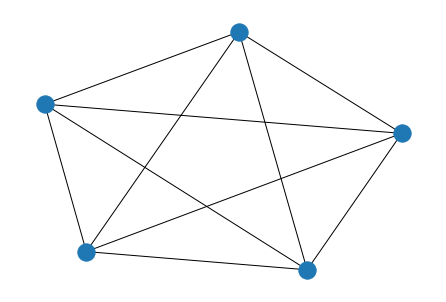

In [307]:
G = random_graph(5, 0)
print()

g = nx.Graph(G)
nx.draw(g)

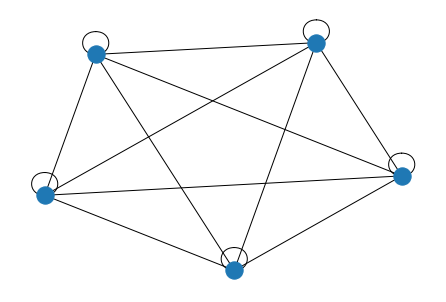

In [241]:
{0: [2, 3, 4], 1: [1, 3], 2: [0, 2, 4], 3: [0, 1, 3, 4], 4: [0, 2, 3, 4]}

{0: [2, 3, 4], 1: [1, 3], 2: [0, 2, 4], 3: [0, 1, 3, 4], 4: [0, 2, 3, 4]}

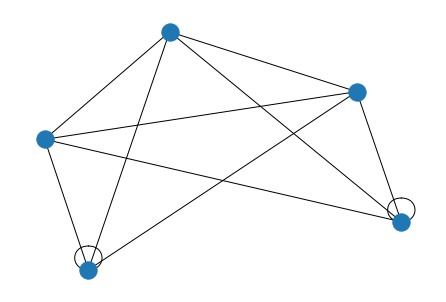

In [191]:
G

{0: [1, 2, 3, 4], 1: [0, 4], 2: [0, 2, 4], 3: [0, 4], 4: [0, 1, 2, 3, 4]}